# Naive Bayes 란?

각 특징 요소(feature)들이 서로 독립적이다 라고 가정

If p(C1|x, y) > p(C2|x, y) 이면 -> C1 == C1에 속할 확률이 C2에 속할 확률보다 크면 C1

If p(C2|x, y) > p(C1|x, y) 이면 -> C2 == C2에 속할 확률이 C1에 속할 확률보다 크면 C2



공이 다음과 같이 존재

흰 흰 흰 / 검 검 검 검

하얀 공 뽑을 확률 P(w) = 3/7

검은 공 뽑을 확률 P(b) = 4/7

바구니A => 흰2 검2  바구니B => 흰1 검2


*   Prior Probabilities (사전 확률)

P(A) = 4/7

P(w|A) = 2/4 = 1/2  바구니A에서 흰색 공을 뽑을 확률

P(b|A) = 2/4 = 1/2  바구니A에서 검은 공을 뽑을 확률

P(B) = 3/7

P(w|B) = 1/3

P(b|B) = 2/3


*   Posterior Probabilities (사후 확률)

Need P(A|w) & P(B|w), 하얀 공이 pick 됐을 때

Need P(A|b) & P(B|b), 검은 공이 pick 됐을 때




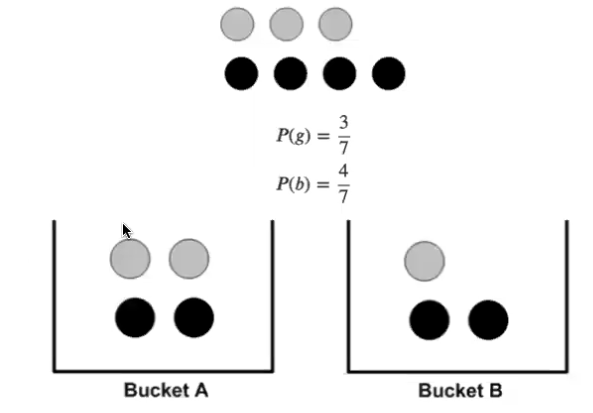

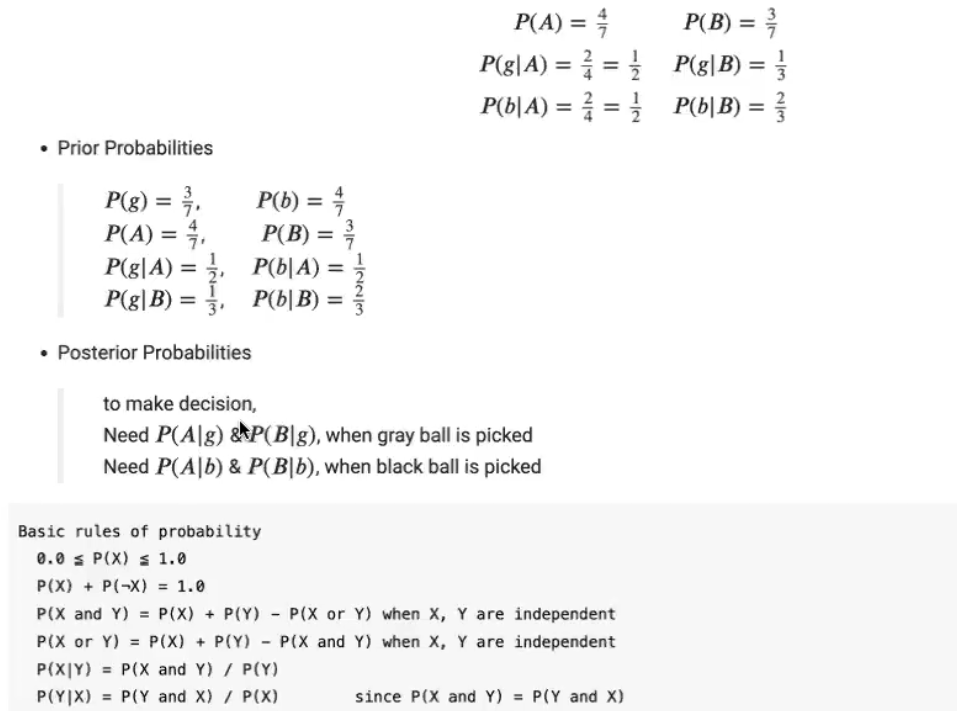

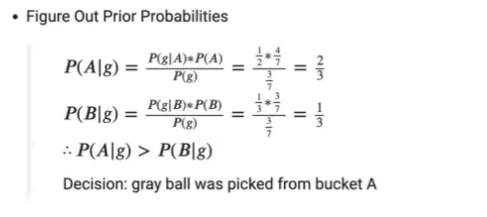

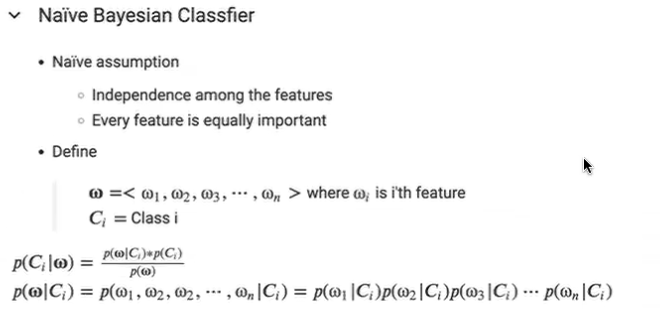

# Native Bayesian 분류

-> 가정
1. 각 feature(특징)이 상호 독립이다.
2. 각 feature은 모두 같은 가중치를 갖는다.

-> w =< w1, w2, w3...> 각 특징들이 ##상호 독립##이라면?

-> p(w|Ci) = p(w1, w2, w3...|Ci) = p(w1|Ci)p(w2|Ci)...p(wn|Ci) 다 곱해버림

Ex) 경제 뉴스에서 "정치"라는 단어가 나올 확률, 과학 뉴스에서 "정치"라는 단어가 나올 확률... 다 구해서 곱해버림

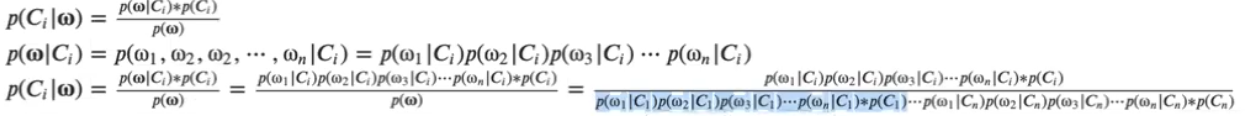

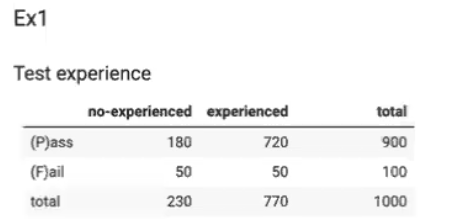

P(P) = 0.9   /  P(F) = 0.1

P(n) = 0.23  /  P(e) = 0.77

P(n|P) = P(P|n)*P(n)/P(P) = 180/900 = 0.2

-> P(e|P) = 1 - 0.2 = 0.8

P(n|F) = P(F|n)*P(n)/P(F) = 50/100 = 0.5

-> P(e|F) = 1 - 0.5 = 0.5

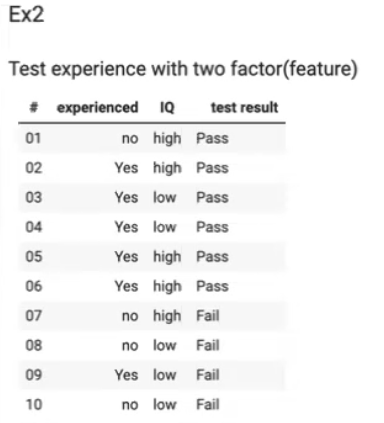

P(P|n, h) 와 P(F|n, h) 비교

P(P) = 0.6 / P(F) = 0.4

P(n,h) = 0.2

P(y,h) = 0.3

P(n,l) = 0.2

P(y,l) = 0.3


그런데 feature가 늘어날 수록 경우의 수가 너무 많아진다. 그럼 어떻게?

각 feature를 독립으로 두어서 각 feature들에 대해서만 계산하여 곱하기 => naive bayes



# Flight Delay's

* 하나의 레코드는 특정 항공기 정보를 나타낸다. 전체 2,2201대의 항공 편 중에서 연착 된 항공편의 비율은 19.5%이다. 출력 변수는 해당 항공기가 연착될지 여부 (1:연착, 0:정시도착)이다.

출발 예정 시간 / 항공사 코드 / 출발 시간 / 도착 공학 코드 / 비행 거리 / 비행 날짜 / 비행기 번호 / 출발 공항 코드 / 날씨 / 요일 / 월 / 식별번호 / 비행 상태


In [39]:
import pandas as pd

delays_df = pd.read_csv('FlightDelays.csv')
delays_df.head()

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight Status
0,1455,OH,1455,JFK,184,01/01/2004,5935,BWI,0,4,1,N940CA,ontime
1,1640,DH,1640,JFK,213,01/01/2004,6155,DCA,0,4,1,N405FJ,ontime
2,1245,DH,1245,LGA,229,01/01/2004,7208,IAD,0,4,1,N695BR,ontime
3,1715,DH,1709,LGA,229,01/01/2004,7215,IAD,0,4,1,N662BR,ontime
4,1039,DH,1035,LGA,229,01/01/2004,7792,IAD,0,4,1,N698BR,ontime


In [40]:
# 카테고리화
delays_df.DAY_WEEK = delays_df.DAY_WEEK.astype('category')
delays_df['Flight Status'] = delays_df['Flight Status'].astype('category')  # 문자열과 같이 용량 많이 차지하는 내용을 0, 1, 2 등의 카테고리로 나누어서 사용 / 출력은 똑같지만 내부가 달라짐

delays_df.head()

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight Status
0,1455,OH,1455,JFK,184,01/01/2004,5935,BWI,0,4,1,N940CA,ontime
1,1640,DH,1640,JFK,213,01/01/2004,6155,DCA,0,4,1,N405FJ,ontime
2,1245,DH,1245,LGA,229,01/01/2004,7208,IAD,0,4,1,N695BR,ontime
3,1715,DH,1709,LGA,229,01/01/2004,7215,IAD,0,4,1,N662BR,ontime
4,1039,DH,1035,LGA,229,01/01/2004,7792,IAD,0,4,1,N698BR,ontime


In [41]:
# 시간표현을 간소화
delays_df.CRS_DEP_TIME = [round(t / 100) for t in delays_df.CRS_DEP_TIME]  # 시간을 100으로 나눠서 표현
delays_df.CRS_DEP_TIME = delays_df.CRS_DEP_TIME.astype('category')  # 그리고 이걸 카테고리화

delays_df.head()

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight Status
0,15,OH,1455,JFK,184,01/01/2004,5935,BWI,0,4,1,N940CA,ontime
1,16,DH,1640,JFK,213,01/01/2004,6155,DCA,0,4,1,N405FJ,ontime
2,12,DH,1245,LGA,229,01/01/2004,7208,IAD,0,4,1,N695BR,ontime
3,17,DH,1709,LGA,229,01/01/2004,7215,IAD,0,4,1,N662BR,ontime
4,10,DH,1035,LGA,229,01/01/2004,7792,IAD,0,4,1,N698BR,ontime


In [42]:
# # 추측에 사용할 데이터
# predictors = ['DAY_WEEK', 'CRS_DEP_TIME', 'ORIGIN', 'DEST', 'CARRIER']
# # 이를 통해 얻을 결과
# outcome = 'Flight Status'

# # X에 get_dummies를 통해 카테고리화한 predictors 이용
# X = pd.get_dummies(delays_df[predictors])
# y = delays_df['Flight Status']
# classes = list(y.cat.categories)

# X.head()

In [43]:
# predictors = ['DAY_WEEK', 'CRS_DEP_TIME', 'ORIGIN', 'DEST', 'CARRIER']
# outcome = 'Flight Status'

# X = pd.get_dummies(delays_df[predictors])
# y = delays_df['Flight Status']
# classes = list(y.cat.categories)

# print(X.head())

In [44]:
predictors = ['DAY_WEEK', 'CRS_DEP_TIME', 'ORIGIN', 'DEST', 'CARRIER']
# 'DAY WEEK'를 사용한다면, 요일 별 연착 여부 0 or 1
# DAY WEEK는 월~일 까지 7개의 요일에 대해 연착 여부 총 7 Column이 생성
outcome = 'Flight Status'

X = pd.get_dummies(delays_df[predictors])  # get_dummies -> 하나의 카테고리만 1로 두고 나머지 0
y = delays_df['Flight Status']
classes = list(y.cat.categories)

print(X.head())
print(y.head())
print(classes)

   DAY_WEEK_1  DAY_WEEK_2  DAY_WEEK_3  DAY_WEEK_4  DAY_WEEK_5  DAY_WEEK_6  \
0       False       False       False        True       False       False   
1       False       False       False        True       False       False   
2       False       False       False        True       False       False   
3       False       False       False        True       False       False   
4       False       False       False        True       False       False   

   DAY_WEEK_7  CRS_DEP_TIME_6  CRS_DEP_TIME_7  CRS_DEP_TIME_8  ...  DEST_JFK  \
0       False           False           False           False  ...      True   
1       False           False           False           False  ...      True   
2       False           False           False           False  ...     False   
3       False           False           False           False  ...     False   
4       False           False           False           False  ...     False   

   DEST_LGA  CARRIER_CO  CARRIER_DH  CARRIER_DL  CARRIER

In [45]:
print(delays_df['Flight Status'].value_counts() / len(delays_df))
print()

for predictor in predictors:
    df = delays_df[['Flight Status', predictor]]
    freqTable = df.pivot_table(index='Flight Status', columns=predictor, aggfunc=len)
    propTable = freqTable.apply(lambda x: x / sum(x), axis=1)
pd.reset_option('display.precision')

Flight Status
ontime     0.805543
delayed    0.194457
Name: count, dtype: float64



<ipython-input-45-0f1bf1576268>:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  freqTable = df.pivot_table(index='Flight Status', columns=predictor, aggfunc=len)
<ipython-input-45-0f1bf1576268>:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  freqTable = df.pivot_table(index='Flight Status', columns=predictor, aggfunc=len)
<ipython-input-45-0f1bf1576268>:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  freqTable = df.pivot_table(index='Flight Status', columns=predictor, aggfunc=len)
<ipython-input-45-0

In [46]:
# from sklearn.model_selection import train_test_split
# from sklearn.naive_bayes import MultinomialNB
# # training 데이터셋과 validation 데이터셋으로 분리
# # split으로 train, validation data 나누기
# X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.40, random_state=1)

# # naive Bayes
# delays_nb = MultinomialNB(alpha=0.01)
# delays_nb.fit(X_train, y_train)  # .fit() -> training 데이터의 X, y값으로 학습

# # 값 예측하기
# predProb_train = delays_nb.predict_proba(X_train)  # X_train과 valid로 예측값을 생성
# predProb_valid = delays_nb.predict_proba(X_valid)

# # y 값 class 예측
# y_valid_pred = delays_nb.predict(X_valid)  # y도 마찬가지로 예측값 생성
# y_train_pred = delays_nb.predict(X_train)

# # 원본 DataFrame 분리
# train_df, valid_df = train_test_split(delays_df, test_size=0.4, random_state=1)

# pd.set_option('display.precision', 4)

# # Flight Status Prop
# print(train_df['Flight Status'].value_counts() / len(train_df))
# print()
# for predictor in predictors:
#     # freq Table 생성
#     df = train_df[['Flight Status', predictor]]
#     freqTable = df.pivot_table(index='Flight Status', columns=predictor, aggfunc=len)
#     # row합으로 나누기 -> 조건부 확률 계산
#     propTable = freqTable.apply(lambda x: x / sum(x), axis=1)
#     print(propTable)
#     print()
# pd.reset_option('display.precision')

# # P(ontime | Day_Week = 1, Dep_Time = 6, Origin = BWI, Dest = EWR, Carrier = CO)
# # P(delayed | Day_Week = 1, Dep_Time = 6, Origin = BWI, Dest = EWR, Carrier = CO)
# pOnMon6BwiEwrCo = 0.126340 * 0.062042 * 0.060914 * 0.284264 * 0.038353
# pDeMon6BwiEwrCo = 0.196262 * 0.037383 * 0.086449 * 0.376168 * 0.060748

# pMon6BwiEwrCo = pOnMon6BwiEwrCo + pDeMon6BwiEwrCo
# pOnMon6BwiEwrCo = pOnMon6BwiEwrCo / pMon6BwiEwrCo
# pDeMon6BwiEwrCo = pDeMon6BwiEwrCo / pMon6BwiEwrCo
# print(pOnMon6BwiEwrCo, pDeMon6BwiEwrCo)

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
# training 데이터셋과 validation 데이터셋으로 분리
# split으로 train, validation data 나누기
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.40, random_state=1)

# naive Bayes
delays_nb = MultinomialNB(alpha=0.01)
delays_nb.fit(X_train, y_train)  # .fit() -> training 데이터의 X, y값으로 학습

# 값 예측하기
predProb_train = delays_nb.predict_proba(X_train)  # X_train과 valid로 예측값을 생성
predProb_valid = delays_nb.predict_proba(X_valid)

# y 값 class 예측
y_valid_pred = delays_nb.predict(X_valid)  # y도 마찬가지로 예측값 생성
y_train_pred = delays_nb.predict(X_train)

In [48]:
# 원본 DataFrame 분리
train_df, valid_df = train_test_split(delays_df, test_size=0.4, random_state=1)

pd.set_option('display.precision', 4)

# Flight Status Prop
print(train_df['Flight Status'].value_counts() / len(train_df))
print()
for predictor in predictors:
    # freq Table 생성
    df = train_df[['Flight Status', predictor]]
    freqTable = df.pivot_table(index='Flight Status', columns=predictor, aggfunc=len)
    # row합으로 나누기 -> 조건부 확률 계산
    propTable = freqTable.apply(lambda x: x / sum(x), axis=1)
    print(propTable)
    print()
pd.reset_option('display.precision')

Flight Status
ontime     0.8023
delayed    0.1977
Name: count, dtype: float64

DAY_WEEK            1       2       3       4       5      6       7
Flight Status                                                       
delayed        0.1916  0.1494  0.1149  0.1264  0.1877  0.069  0.1609
ontime         0.1246  0.1416  0.1445  0.1794  0.1690  0.136  0.1048

CRS_DEP_TIME        6       7       8       9      10      11      12      13  \
Flight Status                                                                   
delayed        0.0345  0.0536  0.0651  0.0192  0.0307  0.0115  0.0498  0.0460   
ontime         0.0623  0.0633  0.0850  0.0567  0.0519  0.0340  0.0661  0.0746   

CRS_DEP_TIME       14      15      16      17      18      19      20      21  
Flight Status                                                                  
delayed        0.0383  0.2031  0.0728  0.1533  0.0192  0.0996  0.0153  0.0881  
ontime         0.0576  0.1171  0.0774  0.1001  0.0349  0.0397  0.0264  0.0529  

<ipython-input-48-cba0e43927ee>:12: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  freqTable = df.pivot_table(index='Flight Status', columns=predictor, aggfunc=len)
<ipython-input-48-cba0e43927ee>:12: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  freqTable = df.pivot_table(index='Flight Status', columns=predictor, aggfunc=len)
<ipython-input-48-cba0e43927ee>:12: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  freqTable = df.pivot_table(index='Flight Status', columns=predictor, aggfunc=len)
<ipython-input-4

In [49]:
# P(delayed | Carrier = DL, Day_Week = 7, Dep_Time = 10, Dest = LGA, Origin = DCA)
P_hat_delayed = 0.0958 * 0.1609 * 0.0307 * 0.4215 * 0.5211 * 0.1977
# P(ontime | Carrier = DL, Day_Week = 7, Dep_Time = 10, Dest = LGA, Origin = DCA)
P_hat_ontime = 0.2040 * 0.1048 * 0.0519 * 0.5779 * 0.6478 * 0.8023
print('P_hat_delayed ~ ', P_hat_delayed)
print('P_hat_ontime ~ ', P_hat_ontime)
print('P(delayed|...) = ', P_hat_delayed / (P_hat_delayed + P_hat_ontime))
print('P(ontime|...) = ', P_hat_ontime / (P_hat_delayed + P_hat_ontime))


P_hat_delayed ~  2.0548742506526157e-05
P_hat_ontime ~  0.00033326464123921066
P(delayed|...) =  0.05807791183301656
P(ontime|...) =  0.9419220881669834


In [50]:
# 특정 세트 골라서 Subset 생성
df = pd.concat([pd.DataFrame({'actual': y_valid, 'predicted': y_valid_pred}),
                pd.DataFrame(predProb_valid, index=y_valid.index)], axis=1)
# mask로 조건을 줌
mask = ((X_valid.CARRIER_DL == 1) & (X_valid.DAY_WEEK_7 == 1) & (X_valid.CRS_DEP_TIME_10 == 1) &
        (X_valid.DEST_LGA == 1) & (X_valid.ORIGIN_DCA == 1))

print(df[mask])

      actual predicted         0         1
1225  ontime    ontime  0.057989  0.942011


In [51]:
from typing import Any, List, Optional
from sklearn.metrics import accuracy_score, confusion_matrix
Vector = Any

def classificationSummary(y_true: Vector, y_pred: Vector, class_names: Optional[List[str]] = None) -> None:
    confusionMatrix = confusion_matrix(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    print(f'Confusion Matrix (Accuracy {accuracy:.4f})\n')

    # Pretty-print confusion matrix
    cm = confusionMatrix
    labels = class_names

    if labels is None:
        labels = [str(i) for i in range(len(cm))]

    #confusion matrix / labels를 String으로 변환
    cm = [[str(i) for i in row] for row in cm]
    labels = [str(i) for i in labels]

    # 첫 label column, 셀 너비 결정
    prediction = 'Prediction'
    actual = 'Actual'
    labelWidth = max(len(s) for s in labels)
    cmWidth = max(*(len(s) for row in cm for s in row), labelWidth) + 1
    labelWidth = max(labelWidth, len(actual))

    # 형식 지정
    fmt1 = f'{{:>{labelWidth}}}'
    fmt2 = f'{{:>{cmWidth}}}' * len(labels)

    # confusion matrix 출력
    print(fmt1.format(' ') + ' ' + prediction)
    print(fmt1.format(actual), end='')
    print(fmt2.format(*labels))
    for cls, row in zip(labels, cm):
        print(fmt1.format(cls), end='')
        print(fmt2.format(*row))
classificationSummary(y_train, y_train_pred, class_names=classes)

# 결과를 보면 실제 delayed를 delayed 예측 -> 52개
# 실제 ontime -> 예측 ontime = 998개
# 그리고 오류가 209 + 61개

Confusion Matrix (Accuracy 0.7955)

        Prediction
 Actual delayed  ontime
delayed      52     209
 ontime      61     998
